In [1]:
# filter+extract.py
import os
import numpy as np
import pandas as pd
import statistics as st
from scipy import signal
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,classification_report

In [14]:
data1n = []
data2n = []
root = 'Filtered'
emosi = ['kaget','marah','santai','senang']
maindirs = 'IAPS hari 2'
dirs = os.listdir(maindirs)
def lowpass_filter(sinyal,fcl):
    sampleRate = 50
    wnl = fcl/(sampleRate)
    b,a = signal.butter(3,wnl,'lowpass')
    fil = signal.filtfilt(b, a, sinyal)
    return fil

def filtering(folder):
    print("Filter dimulai, harap tunggu sebentar")
    dirs = os.listdir(folder)
    for j in dirs:
        df = pd.read_csv(folder+'/'+str(j))
        print(j)
        #wk = df["Waktu"]
        pp = df['Pipi']
        al = df['Alis']
        #wkt = list(wk)
        data1 = list(pp)
        data2 = list(al)

        t = [i for i in range(len(data1))]
        w = lowpass_filter(data1,2.0)
        x = lowpass_filter(data2,2.0)

        mn1 = min(w)
        mx1 = max(w)
        mn2 = min(x)
        mx2 = max(x)

        for i in range(len(w)):
            data1n.append((w[i]-mn1)/(mx1-mn1))
            data2n.append((x[i]-mn2)/(mx2-mn2))

        f = plt.figure()
        plt.xlabel('Data ke-')
        plt.ylabel('mV')
        plt.grid(True)
        plt.title(j)
        plt.plot(t,data1n)
        plt.plot(t,data2n)
        plt.savefig('Data_Plot3/'+j+'2.png')
        f.clear()
        plt.close(f)
        d_t = list(zip(data1n,data2n))
        root = 'Data_filter4'
        finaldirs = os.path.join(root,j)
        df1 = pd.DataFrame(d_t,columns=['Pipi','Alis'])
        df1.to_csv(finaldirs)
        data1n.clear()
        data2n.clear()
    print('Filter Selesai !')


In [15]:
filtering('IAPS hari 2')

Filter dimulai, harap tunggu sebentar
aditNH1.csv
aditNH2.csv
aditNH3.csv
aditNH4.csv
aditNH5.csv
aditNL1.csv
aditNL2.csv
aditNL3.csv
aditNL4.csv
aditNL5.csv
aditPH1.csv
aditPH2.csv
aditPH3.csv
aditPH4.csv
aditPH5.csv
aditPL1.csv
aditPL2.csv
aditPL3.csv
aditPL4.csv
aditPL5.csv
agusNH1.csv
agusNH2.csv
agusNH3.csv
agusNH4.csv
agusNH5.csv
agusNL1.csv
agusNL2.csv
agusNL3.csv
agusNL4.csv
agusNL5.csv
agusPH1.csv
agusPH2.csv
agusPH3.csv
agusPH4.csv
agusPH5.csv
agusPL1.csv
agusPL2.csv
agusPL3.csv
agusPL4.csv
agusPL5.csv
aminNH1.csv
aminNH2.csv
aminNH3.csv
aminNH4.csv
aminNH5.csv
aminNL1.csv
aminNL2.csv
aminNL3.csv
aminNL4.csv
aminNL5.csv
aminPH1.csv
aminPH2.csv
aminPH3.csv
aminPH4.csv
aminPH5.csv
aminPL1.csv
aminPL2.csv
aminPL3.csv
aminPL4.csv
aminPL5.csv
bagusNH1.csv
bagusNH2.csv
bagusNH3.csv
bagusNH4.csv
bagusNH5.csv
bagusNL1.csv
bagusNL2.csv
bagusNL3.csv
bagusNL4.csv
bagusNL5.csv
bagusPH1.csv
bagusPH2.csv
bagusPH3.csv
bagusPH4.csv
bagusPH5.csv
bagusPL1.csv
bagusPL2.csv
bagusPL3.csv
bagusPL4

In [2]:
data1n = []
data2n = []
root_filter = 'Filtered'
emosi = ['NH','NL','PH','PL']
# pasien = ['adit','agus','amin','eka','riznop']
pasien = ['adit','agus','amin','bagus','basith','eka','hanif','rizki']
stdvn1 = []
rrtn1 = []
mdn1 = []
stdvn2 = []
rrtn2 = []
mdn2 = []
emosi_list = []
count = 0
root_extract = 'IAPS hari 2'
rawdata = []
pipi = []
alis = []
wkt = []
count = 0
header_list = ['Waktu','Pipi','Alis']
data = []
X = []
y = []

In [18]:
# int((len(dirs2)-1)/4)+1
def extract_feature(folder):
    dirs2 = os.listdir(folder)
    count = 0
    root = 'IAPS3_extract'
    for y in pasien:
        for i in emosi:
            for j in range(1,6):
                df = pd.read_csv(folder+'/'+y+i+str(j)+'.csv')
                print(folder+'/'+y+i+str(j)+'.csv')
                data1 = list(df['Pipi'].to_numpy())
                data2 = list(df['Alis'].to_numpy())
                stdv1 = st.stdev(data1)
                rrt1 = st.mean(data1)
                md1 = st.median(data1)
                stdvn1.append(stdv1)
                rrtn1.append(rrt1)
                mdn1.append(md1)
                stdv2 = st.stdev(data2)
                rrt2 = st.mean(data2)
                md2 = st.median(data2)
                stdvn2.append(stdv2)
                rrtn2.append(rrt2)
                mdn2.append(md2)
                if(i == 'NH'):
                    mk = 1
                    emosi_list.append(mk)
                elif(i == 'NL'):
                    mk = 2
                    emosi_list.append(mk)
                elif(i == 'PH'):
                    mk = 3
                    emosi_list.append(mk)
                elif(i == 'PL'):
                    mk = 4
                    emosi_list.append(mk)
#                 print('Selesai !')
    namafile = 'iaps4_extracted.csv'
#     namafile = 'tes_extracted2.csv'
    finaldirs = os.path.join(root,namafile)
    df1 = pd.DataFrame({'STDEV1' : stdvn1,'AVG1' : rrtn1,'MDN1' : mdn1,
                        'STDEV2':stdvn2,'AVG2' : rrtn2,'MDN2' : mdn2,'EMOSI' : emosi_list})
    df1.to_csv(finaldirs,mode='w+',index=False)
    print(finaldirs)
    stdvn1.clear()
    rrtn1.clear()
    mdn1.clear()
    stdvn2.clear()
    rrtn2.clear()
    mdn2.clear()
    emosi_list.clear()
    print('Ekstraksi Fitur Selesai !')
            #namafile = i+'_extracted.csv'
            #finaldirs = os.path.join(root,namafile)
            #if(i == 'kaget'):
            #    i = 1
            #elif(i == 'marah'):
            #    i = 2
            #elif(i == 'santai'):
            #    i = 3
            #elif(i == 'senang'):
            #    i = 4
            #df1 = pd.DataFrame({'STDEV1' : stdvn1,'AVG1' : rrtn1,'MDN1' : mdn1,
            #                    'STDEV2':stdvn2,'AVG2' : rrtn2,'MDN2' : mdn2,'EMOSI' : i})
            #df1.to_csv(finaldirs,mode='w+')
            #print(finaldirs)
            #stdvn1.clear()
            #rrtn1.clear()
            #mdn1.clear()
            #stdvn2.clear()
            #rrtn2.clear()
            #mdn2.clear()

def create_model():
    model = keras.models.Sequential([
            keras.layers.LSTM(8, return_sequences=True, input_shape=[None,6]),
            keras.layers.LSTM(8),
            keras.layers.Dense(4, activation='softmax')
            ])
    model.compile(
        loss="categorical_crossentropy",
        optimizer=keras.optimizers.Adam(lr=0.01),
        metrics=["acc"]
    )
    model.summary()
    return model


In [19]:
# extract_feature(folder='Data_filter4')

Data_filter4/aditNH1.csv
Data_filter4/aditNH2.csv
Data_filter4/aditNH3.csv
Data_filter4/aditNH4.csv
Data_filter4/aditNH5.csv
Data_filter4/aditNL1.csv
Data_filter4/aditNL2.csv
Data_filter4/aditNL3.csv
Data_filter4/aditNL4.csv
Data_filter4/aditNL5.csv
Data_filter4/aditPH1.csv
Data_filter4/aditPH2.csv
Data_filter4/aditPH3.csv
Data_filter4/aditPH4.csv
Data_filter4/aditPH5.csv
Data_filter4/aditPL1.csv
Data_filter4/aditPL2.csv
Data_filter4/aditPL3.csv
Data_filter4/aditPL4.csv
Data_filter4/aditPL5.csv
Data_filter4/agusNH1.csv
Data_filter4/agusNH2.csv
Data_filter4/agusNH3.csv
Data_filter4/agusNH4.csv
Data_filter4/agusNH5.csv
Data_filter4/agusNL1.csv
Data_filter4/agusNL2.csv
Data_filter4/agusNL3.csv
Data_filter4/agusNL4.csv
Data_filter4/agusNL5.csv
Data_filter4/agusPH1.csv
Data_filter4/agusPH2.csv
Data_filter4/agusPH3.csv
Data_filter4/agusPH4.csv
Data_filter4/agusPH5.csv
Data_filter4/agusPL1.csv
Data_filter4/agusPL2.csv
Data_filter4/agusPL3.csv
Data_filter4/agusPL4.csv
Data_filter4/agusPL5.csv


In [3]:
keras.backend.clear_session()
# model = create_model()
model = keras.models.load_model('reborn1')

(278, 1, 6)
(278, 4)
(142, 1, 6)
(142, 4)
Epoch 1/20
14/14 [==============================] - 0s 9ms/step - loss: 0.4776 - acc: 0.8094 - val_loss: 1.3647 - val_acc: 0.6690
Epoch 2/20
14/14 [==============================] - 0s 7ms/step - loss: 0.6222 - acc: 0.7662 - val_loss: 0.4605 - val_acc: 0.8451
Epoch 3/20
14/14 [==============================] - 0s 6ms/step - loss: 0.3953 - acc: 0.8525 - val_loss: 0.4027 - val_acc: 0.8239
Epoch 4/20
14/14 [==============================] - 0s 7ms/step - loss: 0.3460 - acc: 0.8741 - val_loss: 0.3199 - val_acc: 0.8380
Epoch 5/20
14/14 [==============================] - 0s 7ms/step - loss: 0.2849 - acc: 0.9029 - val_loss: 0.3095 - val_acc: 0.8521
Epoch 6/20
14/14 [==============================] - 0s 7ms/step - loss: 0.2736 - acc: 0.9353 - val_loss: 0.3426 - val_acc: 0.8451
Epoch 7/20
14/14 [==============================] - 0s 7ms/step - loss: 0.2302 - acc: 0.9317 - val_loss: 0.3279 - val_acc: 0.8662
Epoch 8/20
14/14 [==============================

INFO:tensorflow:Assets written to: reborn1\assets


INFO:tensorflow:Assets written to: reborn1\assets


Model berhasil disimpan !


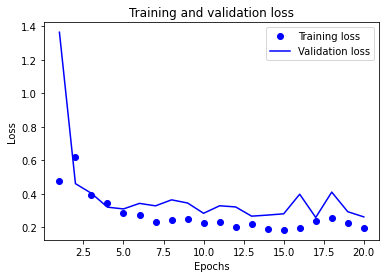

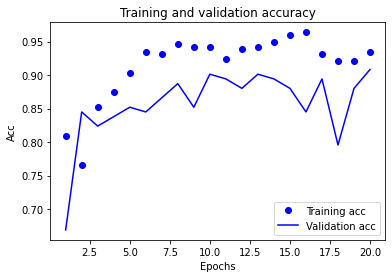

In [75]:
X = []
y = []
maindirs = 'IAPS3_extract'
dirs = os.listdir(maindirs)
emosi = ['NH','NL','PH','PL']
df = pd.read_csv(maindirs+"/"+"janai.csv")
d_t = df.drop('EMOSI',axis=1)
label = pd.get_dummies(df['EMOSI'])
data_len = int(len(d_t))
for i in range (0,data_len):
    temp = d_t.iloc[i]
    temp_list = temp.values.tolist()
    X.append(temp_list)
for j in range(0,data_len):
    temp1 = label.iloc[j]
    temp1_list = temp1.values.tolist()
    y.append(temp1_list)
X = np.array(X)
y = np.array(y)
length = 420
num_train = 278
index = np.random.randint(0,length, size=length)
train_X = X[index[0:num_train]]
train_Y = y[index[0:num_train]]
test_X = X[index[num_train:]]
test_Y = y[index[num_train:]]
# train_X = X[0:num_train]
# train_Y = y[0:num_train]
# test_X = X[num_train:]
# test_Y = y[num_train:]
train_X = np.reshape(train_X, (train_X.shape[0],1,train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0],1,test_X.shape[1]))
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
history = model.fit(
     train_X,
     train_Y,
     batch_size = 20,
     epochs=20,
#      callbacks=[callback],
     validation_data=(test_X,test_Y),
     )
inpoot = int(input("Apakah mau simpan model ? "))
if inpoot == 1:
    nama_model = 'reborn1'
    model.save(nama_model)
    model.save_weights(nama_model+'.h5')
    print("Model berhasil disimpan !")
    keras.backend.clear_session()
else:
    print("ga disimpen")
    keras.backend.clear_session()
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()


In [62]:
count = 0
while count <= 20:
    X = []
    y = []
    maindirs = 'IAPS3_extract'
    dirs = os.listdir(maindirs)
    emosi = ['NH','NL','PH','PL']
    df = pd.read_csv(maindirs+"/"+"janai.csv")
    d_t = df.drop('EMOSI',axis=1)
    label = pd.get_dummies(df['EMOSI'])
    data_len = int(len(d_t))
    for i in range (0,data_len):
        temp = d_t.iloc[i]
        temp_list = temp.values.tolist()
        X.append(temp_list)
    for j in range(0,data_len):
        temp1 = label.iloc[j]
        temp1_list = temp1.values.tolist()
        y.append(temp1_list)
    X = np.array(X)
    y = np.array(y)
    length = 420
    num_train = 278
    index = np.random.randint(0,length, size=length)
    train_X = X[index[0:num_train]]
    train_Y = y[index[0:num_train]]
    test_X = X[index[num_train:]]
    test_Y = y[index[num_train:]]
    train_X = np.reshape(train_X, (train_X.shape[0],1,train_X.shape[1]))
    test_X = np.reshape(test_X, (test_X.shape[0],1,test_X.shape[1]))
    y_pred = model.predict(test_X)
    matrix = confusion_matrix(test_Y.argmax(axis=1), y_pred.argmax(axis=1))
    print('NH,NL,PH,PL')
    print(matrix)
    print(classification_report(test_Y.argmax(axis=1), y_pred.argmax(axis=1), digits=3,target_names=emosi))
    count+=1

NH,NL,PH,PL
[[28  5  0  1]
 [ 3 27  0  0]
 [ 0  0 35  0]
 [ 1  2  4 36]]
              precision    recall  f1-score   support

          NH      0.875     0.824     0.848        34
          NL      0.794     0.900     0.844        30
          PH      0.897     1.000     0.946        35
          PL      0.973     0.837     0.900        43

    accuracy                          0.887       142
   macro avg      0.885     0.890     0.885       142
weighted avg      0.893     0.887     0.887       142

NH,NL,PH,PL
[[26  1  0  2]
 [ 4 32  2  1]
 [ 0  3 36  1]
 [ 1  0  0 33]]
              precision    recall  f1-score   support

          NH      0.839     0.897     0.867        29
          NL      0.889     0.821     0.853        39
          PH      0.947     0.900     0.923        40
          PL      0.892     0.971     0.930        34

    accuracy                          0.894       142
   macro avg      0.892     0.897     0.893       142
weighted avg      0.896     0.894     0

In [4]:
X = []
y = []
maindirs = 'IAPS3_extract'
dirs = os.listdir(maindirs)
emosi = ['NH','NL','PH','PL']
df = pd.read_csv(maindirs+"/"+"janai.csv")
d_t = df.drop('EMOSI',axis=1)
label = pd.get_dummies(df['EMOSI'])
data_len = int(len(d_t))
for i in range (0,data_len):
    temp = d_t.iloc[i]
    temp_list = temp.values.tolist()
    X.append(temp_list)
for j in range(0,data_len):
    temp1 = label.iloc[j]
    temp1_list = temp1.values.tolist()
    y.append(temp1_list)
X = np.array(X)
y = np.array(y)
length = 420
num_train = 0
index = np.random.randint(0,length, size=length)
train_X = X[index[0:num_train]]
train_Y = y[index[0:num_train]]
test_X = X[index[num_train:]]
test_Y = y[index[num_train:]]
train_X = np.reshape(train_X, (train_X.shape[0],1,train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0],1,test_X.shape[1]))
y_pred = model.predict(test_X)
matrix = confusion_matrix(test_Y.argmax(axis=1), y_pred.argmax(axis=1))
print('NH,NL,PH,PL')
print(matrix)
print(classification_report(test_Y.argmax(axis=1), y_pred.argmax(axis=1), digits=3,target_names=emosi))

NH,NL,PH,PL
[[ 97   5   0   0]
 [  6  83   3   4]
 [  2   2 109   5]
 [  3   3   1  97]]
              precision    recall  f1-score   support

          NH      0.898     0.951     0.924       102
          NL      0.892     0.865     0.878        96
          PH      0.965     0.924     0.944       118
          PL      0.915     0.933     0.924       104

    accuracy                          0.919       420
   macro avg      0.918     0.918     0.917       420
weighted avg      0.920     0.919     0.919       420

